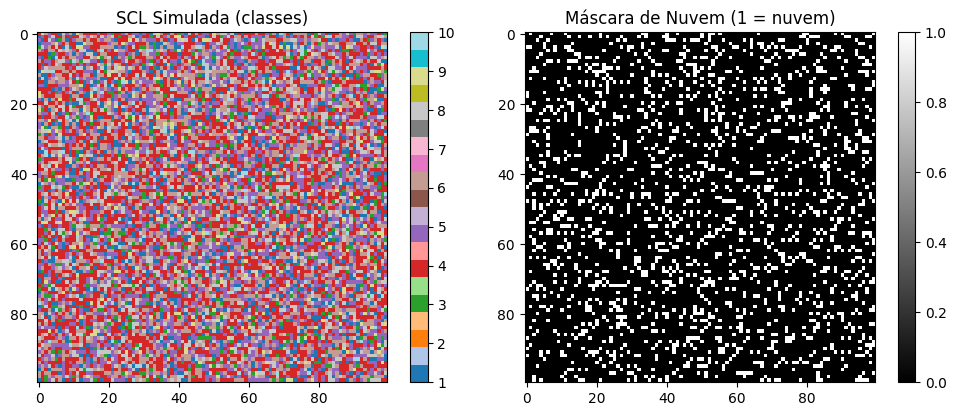

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simula uma imagem SCL fictícia (100x100) com alguns pixels representando nuvens
np.random.seed(42)
scl_simulada = np.random.choice([1, 3, 4, 5, 6, 8, 9, 10], size=(100, 100), p=[0.1, 0.05, 0.3, 0.2, 0.2, 0.1, 0.03, 0.02])

# Define os valores considerados como nuvens: 3 = sombra, 8 = nuvem espessa, 9 = cumulonimbus
valores_nuvem = [3, 8, 9]

# Gera a máscara binária (1 = nuvem, 0 = não-nuvem)
mask = np.isin(scl_simulada, valores_nuvem).astype(np.uint8)

# Visualização
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(scl_simulada, cmap='tab20', interpolation='nearest')
plt.title("SCL Simulada (classes)")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Máscara de Nuvem (1 = nuvem)")
plt.colorbar()

plt.tight_layout()
plt.show()


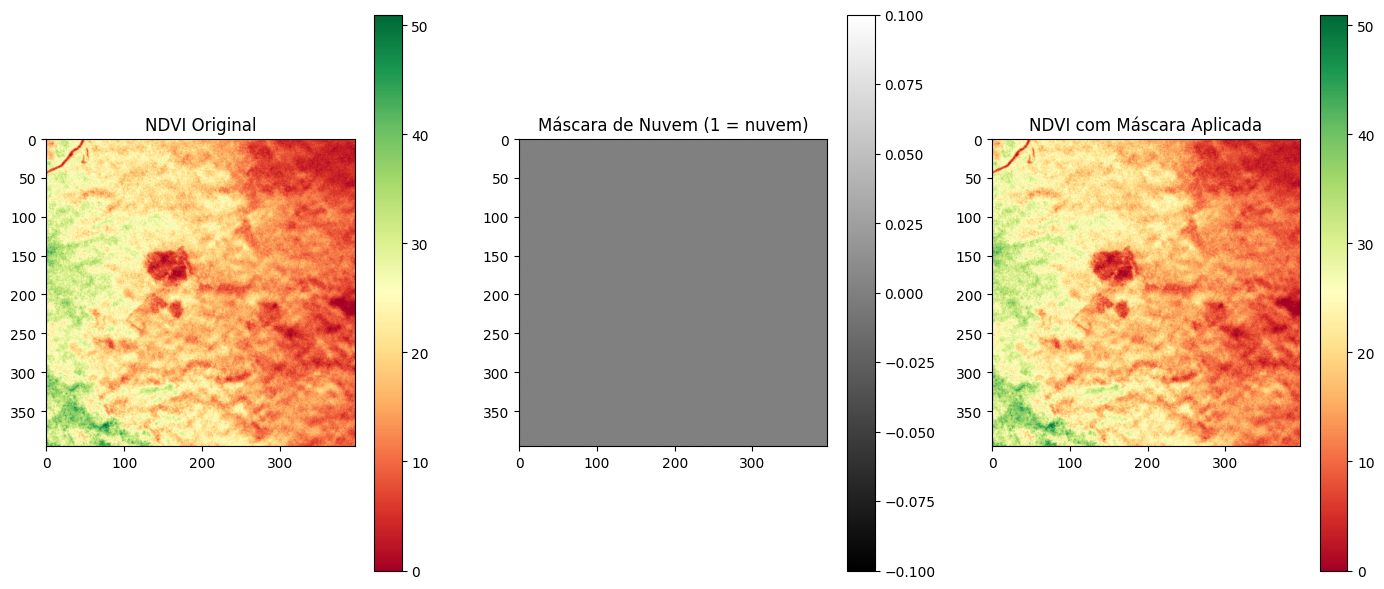

In [2]:
import tifffile
import numpy as np
import matplotlib.pyplot as plt
import os

# Caminho base (para rodar dentro da pasta notebooks/)
base_path = "../data/raw/sentinel2"
base_name = "LATm10.350_LONm67.150"

sentinel_path = f"{base_path}/{base_name}.tiff"
scl_path = f"{base_path}/{base_name}_SCL.tiff"
cloud_mask_path = f"{base_path}/{base_name}_CLOUD_MASK.tiff"

# 📥 Carregamento
sentinel_img = tifffile.imread(sentinel_path)
scl = tifffile.imread(scl_path)
cloud_mask = tifffile.imread(cloud_mask_path)

# Extrai NDVI (4ª banda)
ndvi = sentinel_img[:, :, 3]

# Aplica máscara
ndvi_masked = np.where(cloud_mask == 1, np.nan, ndvi)

# 🎨 Visualização
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
plt.imshow(ndvi, cmap="RdYlGn")
plt.title("NDVI Original")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(cloud_mask, cmap="gray")
plt.title("Máscara de Nuvem (1 = nuvem)")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(ndvi_masked, cmap="RdYlGn")
plt.title("NDVI com Máscara Aplicada")
plt.colorbar()

plt.tight_layout()
plt.show()
